<a href="https://colab.research.google.com/github/shish444/Bigbang_Hackathon/blob/main/Bigbang_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Unzipping the dataset
zip_path = '/content/archive (5).zip'  # Path to the zip file
unzip_dir = '/content/dataset/'  # Directory to unzip the dataset

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"Dataset extracted to {unzip_dir}")

Dataset extracted to /content/dataset/


In [ ]:
# Add these import statements to your code (ipython-input-32-a0fc86d1f894):
from PIL import Image, UnidentifiedImageError

# Custom function to check if the image is valid
def is_valid_image(filepath):
    try:
        img = Image.open(filepath)
        img.verify()  # Verify that it is, in fact, an image
        return True
    except (IOError, UnidentifiedImageError):
        return False

In [ ]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image, UnidentifiedImageError
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to check if an image is valid
def is_valid_image(path):
    try:
        img = Image.open(path)
        img.verify()  # Verify if the image is valid
        return True
    except (OSError, UnidentifiedImageError):
        return False

# Function to remove corrupted images
def clean_dataset(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not is_valid_image(file_path):
                print(f"Removing corrupted image: {file_path}")
                os.remove(file_path)

# Clean dataset before loading
dataset_dir = '/content/dataset/'  # Set the correct path to your dataset
clean_dataset(dataset_dir)

# Load data using ImageDataGenerator with error handling
def safe_data_generator(datagen, directory, batch_size, target_size):
    while True:
        try:
            generator = datagen.flow_from_directory(
                directory,
                target_size=target_size,
                batch_size=batch_size,
                class_mode='binary'
            )
            for data, labels in generator:
                yield data, labels
        except OSError as e:
            print(f"Skipping batch due to OSError: {e}")

# Define ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Define training and validation data generators with safe handling
batch_size = 32
image_size = (150, 150)

train_generator = safe_data_generator(
    train_datagen,
    dataset_dir,
    batch_size=batch_size,
    target_size=image_size
)

validation_generator = safe_data_generator(
    train_datagen,
    dataset_dir,
    batch_size=batch_size,
    target_size=image_size
)

# Build your CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with safe image loading
try:
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        steps_per_epoch=100,
        validation_steps=50,
        epochs=10,
        verbose=1
    )
except Exception as e:
    print(f"Error during model training: {e}")


Found 4012 images belonging to 1 classes.
Epoch 1/10
 74/100 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9401 - loss: 0.0502Skipping batch due to OSError: image file is truncated (5 bytes not processed)
Found 4012 images belonging to 1 classes.
 95/100 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9510 - loss: 0.0411Skipping batch due to OSError: image file is truncated (5 bytes not processed)
Found 4012 images belonging to 1 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.9530 - loss: 0.0394Found 4012 images belonging to 1 classes.
Skipping batch due to OSError: image file is truncated (5 bytes not processed)
Found 4012 images belonging to 1 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 212ms/step - accuracy: 0.9534 - loss: 0.0391 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 1.0000 - loss: 8.4162e-40Skipping batch due to OSError: image file is truncated (5 bytes not processed)
Found 4012 images be

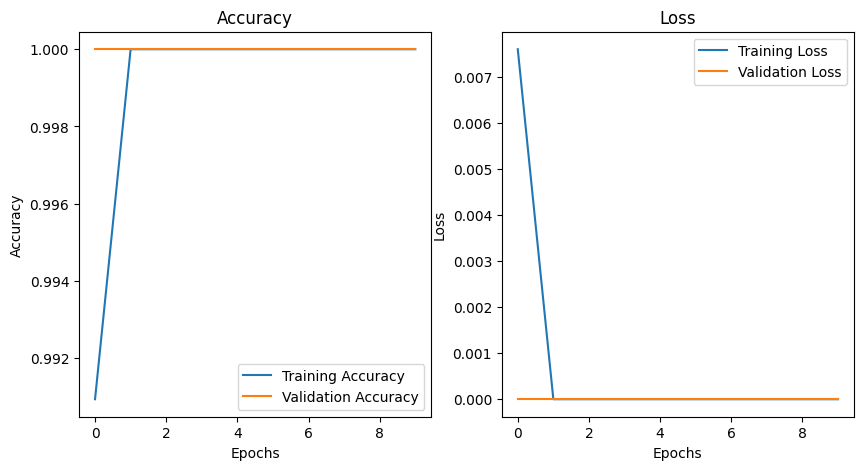

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()